In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)


  
pre_trained_model.summary()



--2019-06-09 12:54:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  90.6MB/s    in 0.9s    

2019-06-09 12:54:25 (90.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (N

In [0]:
for layer in pre_trained_model.layers[:-43]:
  layer.trainable = False

In [3]:
for layer in pre_trained_model.layers:
    print(layer, layer.trainable)

(<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb77fc2a150>, False)
(<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb7319bd790>, False)
(<tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x7fb796871c10>, False)
(<tensorflow.python.keras.layers.core.Activation object at 0x7fb78df90e50>, False)
(<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb73133c050>, False)
(<tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x7fb73133c4d0>, False)
(<tensorflow.python.keras.layers.core.Activation object at 0x7fb7313559d0>, False)
(<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb7312dfed0>, False)
(<tensorflow.python.keras.layers.normalization.BatchNormalizationV1 object at 0x7fb731278210>, False)
(<tensorflow.python.keras.layers.core.Activation object at 0x7fb73128e590>, False)
(<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb731205790>, False)
(<t

In [4]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

('last layer output shape: ', (None, 3, 3, 2048))


In [5]:
from tensorflow.keras.optimizers import Adam

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(4096, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(2048, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 80,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 250,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 100,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2019-06-09 12:54:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   109MB/s    in 0.6s    

2019-06-09 12:54:39 (109 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 50,
            epochs = 18,
            validation_steps = 20,
            verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/18
10/10 [==============================] - 7s 672ms/step - loss: 0.3226 - acc: 0.8470
 - 24s - loss: 0.8755 - acc: 0.5630 - val_loss: 0.3226 - val_acc: 0.8470
Epoch 2/18
10/10 [==============================] - 5s 540ms/step - loss: 0.2885 - acc: 0.9290
 - 20s - loss: 0.5609 - acc: 0.6970 - val_loss: 0.2885 - val_acc: 0.9290
Epoch 3/18
10/10 [==============================] - 5s 532ms/step - loss: 0.5358 - acc: 0.9200
 - 19s - loss: 0.4683 - acc: 0.7805 - val_loss: 0.5358 - val_acc: 0.9200
Epoch 4/18
10/10 [==============================] - 5s 541ms/step - loss: 0.3377 - acc: 0.9420
 - 19s - loss: 0.3899 - acc: 0.8135 - val_loss: 0.3377 - val_acc: 0.9420
Epoch 5/18
10/10 [==============================] - 5s 540ms/step - loss: 0.2879 - acc: 0.9480
 - 19s - loss: 0.3469 - acc: 0.8410 - val_loss: 0.2879 - val_acc: 0.9480
Epoch 6/18
10/10 [==============================] - 5s 531ms/step - loss: 0.3662 - acc: 0.9400
 - 19s - loss: 0.

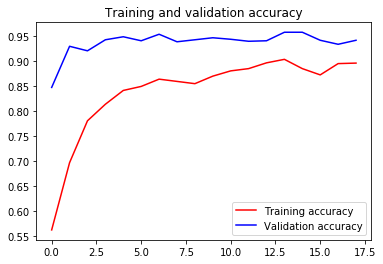

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [9]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Using TensorFlow backend.


Saving dog_new.jpg to dog_new (6).jpg
Saving dog_new2.jpeg to dog_new2 (5).jpeg
Saving dog1.jpeg to dog1 (6).jpeg
Saving dog2.jpg to dog2 (6).jpg
Saving dog3.jpeg to dog3 (6).jpeg
Saving dog4.jpg to dog4 (6).jpg
[1.]
dog1.jpeg is a dog
[1.1510477e-19]
dog3.jpeg is a cat
[0.5967178]
dog2.jpg is a dog
[1.]
dog4.jpg is a dog
[1.2705242e-15]
dog_new.jpg is a cat
[1.]
dog_new2.jpeg is a dog
